<a href="https://colab.research.google.com/github/Kreber10010/p2-time_series/blob/main/Modelos/ARMA_teste2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('dados01.csv')
df['HR_MEDICAO']= df['HR_MEDICAO'].astype(str)

df.loc[df.HR_MEDICAO == '0', 'HR_MEDICAO'] = '000'
df['HR_MEDICAO'].head()

0    000
1    100
2    200
3    300
4    400
Name: HR_MEDICAO, dtype: object

In [19]:
faltantes = df['HR_MEDICAO'].isnull().sum()
print(faltantes)

0


In [20]:
df['ref'] = df['DT_MEDICAO'] + " " + df['HR_MEDICAO']
df['ref'] = pd.to_datetime(df['ref'], errors='coerce', format='%Y-%m-%d %H%M%S')
df.set_index('ref', inplace=True)
df.head()

,Unnamed: 0,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
ref,,,,,,
2021-03-09 00:00:00,0,2021-03-09,000,25.1,96.0,3.289
2021-03-09 01:00:00,1,2021-03-09,100,25.1,93.0,1.740
2021-03-09 02:00:00,2,2021-03-09,200,24.7,94.0,0.970
2021-03-09 03:00:00,3,2021-03-09,300,24.4,93.0,2.458
2021-03-09 04:00:00,4,2021-03-09,400,24.3,92.0,3.320


In [21]:
faltantes = df.isnull().sum()
print(faltantes)

Unnamed: 0      0
DT_MEDICAO      0
HR_MEDICAO      0
TEM_INS        89
UMD_INS       283
RAD_GLO        89
dtype: int64


In [22]:
df['TEM_INS'] = df['TEM_INS'].fillna(df['TEM_INS'].mean())

In [23]:
faltantes_temp = df['TEM_INS'].isnull().sum()
print(faltantes_temp)

0


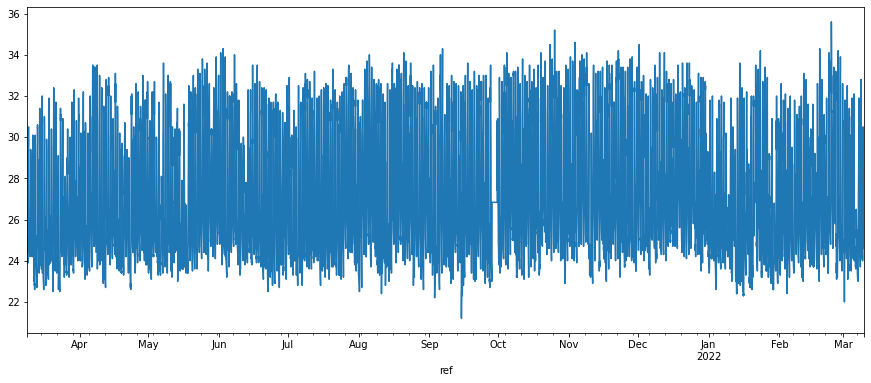

In [24]:
df['TEM_INS'].plot(figsize=(15, 6))

In [25]:
from statsmodels.tsa.arima_model import ARMA

arma = ARMA(df['TEM_INS'], freq='H', order=(3, 3)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


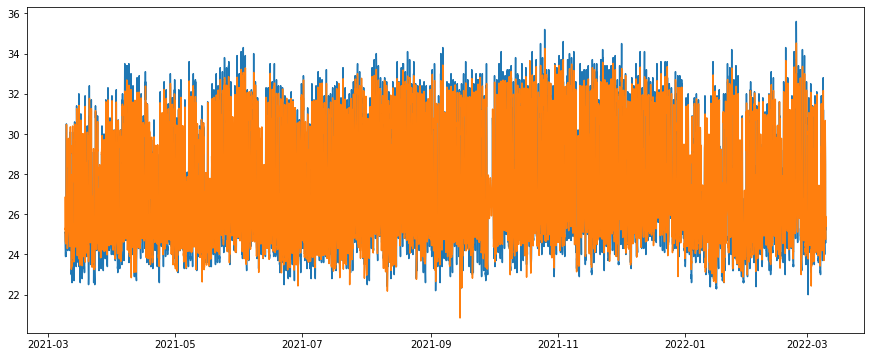

In [26]:
plt.figure(figsize=(15, 6))
plt.plot(df['TEM_INS'])
plt.plot(arma.predict())

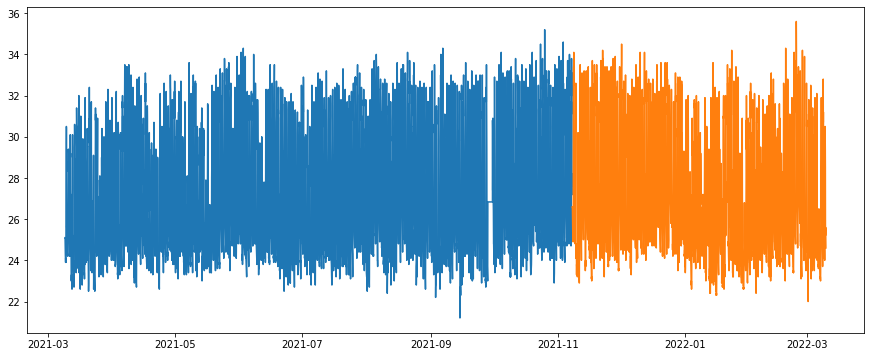

In [27]:
n = len(df['TEM_INS'])
train_size = int(n * 2/3)
train_set = df['TEM_INS'][:train_size]
test_set = df['TEM_INS'][train_size:]
plt.figure(figsize=(15, 6))
plt.plot(train_set)
plt.plot(test_set)

In [28]:
arma33_train = ARMA(train_set, freq='H', order=(3, 3)).fit()
arma33_train.params

const            26.878071
ar.L1.TEM_INS     2.642609
ar.L2.TEM_INS    -2.373100
ar.L3.TEM_INS     0.710785
ma.L1.TEM_INS    -1.717778
ma.L2.TEM_INS     0.596784
ma.L3.TEM_INS     0.200175
dtype: float64

In [29]:
arma33_test = ARMA(test_set, freq='H', order=(3, 3)).fit(arma33_train.params)
(arma33_test.resid ** 2).mean()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1.4387613037538527

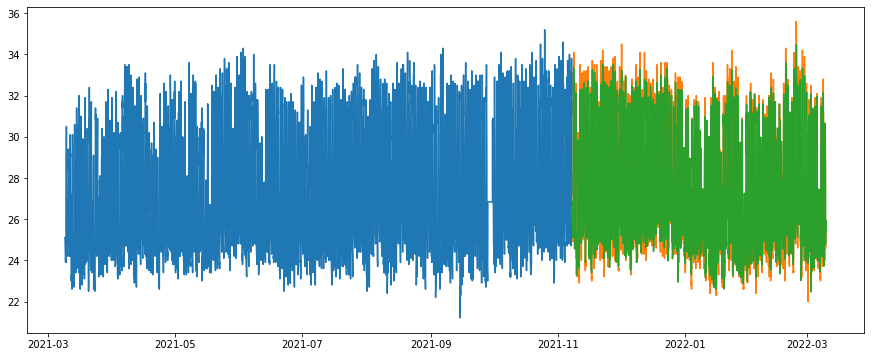

In [30]:
plt.figure(figsize=(15, 6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(arma33_test.predict())

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
arma33_test.forecast()

(array([24.42435003]),
 array([1.19862276]),
 array([[22.07509259, 26.77360747]]))

---------------Daqui em diante foi uma tentativa de realizar as previsões das próximas 24 horas, porém sem a utilização do comando "forecast()"---------------

In [33]:
aux = pd.DataFrame({'DT_MEDICAO':['2022/06/10', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                    'HR_MEDICAO':['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
                    'TEM_INS':[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                    'UMD_INS':[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                    'RAD_GLO':[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]})
aux.head()

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
0,2022/06/10,0,NaN,NaN,NaN
1,NaN,0,NaN,NaN,NaN
2,NaN,0,NaN,NaN,NaN
3,NaN,0,NaN,NaN,NaN
4,NaN,0,NaN,NaN,NaN


In [34]:
aux['DT_MEDICAO'] = aux['DT_MEDICAO'].astype(str)
aux.loc[aux.DT_MEDICAO == 'nan', 'DT_MEDICAO'] = '2022/06/10'
aux['DT_MEDICAO'].head()

0    2022/06/10
1    2022/06/10
2    2022/06/10
3    2022/06/10
4    2022/06/10
Name: DT_MEDICAO, dtype: object

In [35]:
aux['HR_MEDICAO'] = aux['HR_MEDICAO'].astype(int)
x = 0
for i in aux['HR_MEDICAO']:
  aux['HR_MEDICAO'].iloc[x] = (x*100)
  x += 1

aux['HR_MEDICAO'].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0      0
1    100
2    200
3    300
4    400
Name: HR_MEDICAO, dtype: int64

In [36]:
aux['HR_MEDICAO']= aux['HR_MEDICAO'].astype(str)

aux.loc[aux.HR_MEDICAO == '0', 'HR_MEDICAO'] = '000'
aux['HR_MEDICAO'].head()

0    000
1    100
2    200
3    300
4    400
Name: HR_MEDICAO, dtype: object

In [37]:
aux.head()

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
0,2022/06/10,000,NaN,NaN,NaN
1,2022/06/10,100,NaN,NaN,NaN
2,2022/06/10,200,NaN,NaN,NaN
3,2022/06/10,300,NaN,NaN,NaN
4,2022/06/10,400,NaN,NaN,NaN


In [38]:
aux.DT_MEDICAO = pd.to_datetime(aux.DT_MEDICAO)
aux['DT_MEDICAO'] = aux['DT_MEDICAO'].astype(str)
aux['ref'] = aux['DT_MEDICAO'] + " " + aux['HR_MEDICAO']
aux['ref'] = pd.to_datetime(aux['ref'], errors='coerce', format='%Y-%m-%d %H%M%S')
aux.set_index('ref', inplace=True)
aux.head()

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
ref,,,,,
2022-06-10 00:00:00,2022-06-10,000,NaN,NaN,NaN
2022-06-10 01:00:00,2022-06-10,100,NaN,NaN,NaN
2022-06-10 02:00:00,2022-06-10,200,NaN,NaN,NaN
2022-06-10 03:00:00,2022-06-10,300,NaN,NaN,NaN
2022-06-10 04:00:00,2022-06-10,400,NaN,NaN,NaN


In [39]:
testAux_set = aux['TEM_INS'].fillna(0)
testAux_set

ref
2022-06-10 00:00:00    0.0
2022-06-10 01:00:00    0.0
2022-06-10 02:00:00    0.0
2022-06-10 03:00:00    0.0
2022-06-10 04:00:00    0.0
2022-06-10 05:00:00    0.0
2022-06-10 06:00:00    0.0
2022-06-10 07:00:00    0.0
2022-06-10 08:00:00    0.0
2022-06-10 09:00:00    0.0
2022-06-10 10:00:00    0.0
2022-06-10 11:00:00    0.0
2022-06-10 12:00:00    0.0
2022-06-10 13:00:00    0.0
2022-06-10 14:00:00    0.0
2022-06-10 15:00:00    0.0
2022-06-10 16:00:00    0.0
2022-06-10 17:00:00    0.0
2022-06-10 18:00:00    0.0
2022-06-10 19:00:00    0.0
2022-06-10 20:00:00    0.0
2022-06-10 21:00:00    0.0
2022-06-10 22:00:00    0.0
2022-06-10 23:00:00    0.0
Name: TEM_INS, dtype: float64

In [40]:
#arma33_aux_test = ARMA(testAux_set, freq='H', order=(3, 3)).fit(arma33_train.params)

In [41]:
#plt.figure(figsize=(15, 6))
#plt.plot(arma33_aux_test.predict())

In [42]:
#arma33_aux_test.predict()

In [43]:
juntando = pd.concat([df, aux])
juntando.tail(30)

,Unnamed: 0,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
ref,,,,,,
2022-03-09 18:00:00,8778.0,2022-03-09,1800,25.2,96.0,296.259
2022-03-09 19:00:00,8779.0,2022-03-09,1900,25.4,96.0,96.821
2022-03-09 20:00:00,8780.0,2022-03-09,2000,25.6,97.0,103.734
2022-03-09 21:00:00,8781.0,2022-03-09,2100,25.2,97.0,37.913
2022-03-09 22:00:00,8782.0,2022-03-09,2200,24.9,97.0,3.947
2022-03-09 23:00:00,8783.0,2022-03-09,2300,24.6,97.0,1.162
2022-06-10 00:00:00,NaN,2022-06-10,000,NaN,NaN,NaN
2022-06-10 01:00:00,NaN,2022-06-10,100,NaN,NaN,NaN
2022-06-10 02:00:00,NaN,2022-06-10,200,NaN,NaN,NaN


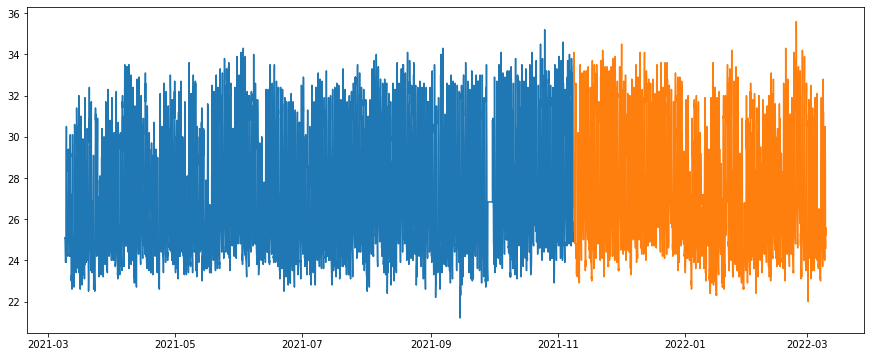

In [44]:
n = len(juntando['TEM_INS'])
train_size_junt = int(n * 2/3)
train_set_junt = juntando['TEM_INS'][:train_size_junt]
test_set_junt = juntando['TEM_INS'][train_size_junt:]
plt.figure(figsize=(15, 6))
plt.plot(train_set_junt)
plt.plot(test_set_junt)

In [45]:
arma33_train_junt = ARMA(train_set_junt, freq='H', order=(3, 3)).fit()
arma33_train_junt.params

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


const            26.883356
ar.L1.TEM_INS     2.643001
ar.L2.TEM_INS    -2.373870
ar.L3.TEM_INS     0.711186
ma.L1.TEM_INS    -1.717756
ma.L2.TEM_INS     0.597424
ma.L3.TEM_INS     0.199857
dtype: float64

In [46]:
arma33_test_junt = ARMA(test_set_junt, freq='H', order=(3, 3)).fit(arma33_train_junt.params)
(arma33_test_junt.resid ** 2).mean()

ValueError: ignored